<a href="https://colab.research.google.com/github/binit24/Datascience-projects/blob/main/Copy_of_Portugues_Election_Dataset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
f = open("ElectionData.csv")

In [41]:
#Reading the Dataset:
df = pd.read_csv('ElectionData.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(21643, 28)


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
#Checking datatypes:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [ ]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['time', 'territoryName', 'Party']


In [ ]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('***********************************************')

time:['2019-10-06 20:10:02' '2019-10-06 20:15:02' '2019-10-06 20:20:02'
 '2019-10-06 20:25:02' '2019-10-06 20:30:02' '2019-10-06 20:35:02'
 '2019-10-06 20:40:02' '2019-10-06 20:45:02' '2019-10-06 20:50:01'
 '2019-10-06 20:55:01' '2019-10-06 21:00:01' '2019-10-06 21:05:01'
 '2019-10-06 21:10:01' '2019-10-06 21:15:02' '2019-10-06 21:20:02'
 '2019-10-06 21:25:02' '2019-10-06 21:30:01' '2019-10-06 21:35:01'
 '2019-10-06 21:40:02' '2019-10-06 21:45:02' '2019-10-06 21:50:01'
 '2019-10-06 21:55:01' '2019-10-06 22:00:02' '2019-10-06 22:05:02'
 '2019-10-06 22:10:01' '2019-10-06 22:15:01' '2019-10-06 22:20:02'
 '2019-10-06 22:25:01' '2019-10-06 22:30:01' '2019-10-06 22:35:01'
 '2019-10-06 22:40:02' '2019-10-06 22:45:01' '2019-10-06 22:50:01'
 '2019-10-06 22:55:02' '2019-10-06 23:00:01' '2019-10-06 23:05:01'
 '2019-10-06 23:10:02' '2019-10-06 23:15:01' '2019-10-06 23:20:01'
 '2019-10-06 23:25:02' '2019-10-06 23:30:01' '2019-10-06 23:35:02'
 '2019-10-06 23:40:01' '2019-10-06 23:45:02' '2019-10-06 

                          Total Missing Value
TimeElapsed                                 0
time                                        0
territoryName                               0
totalMandates                               0
availableMandates                           0
numParishes                                 0
numParishesApproved                         0
blankVotes                                  0
blankVotesPercentage                        0
nullVotes                                   0
nullVotesPercentage                         0
votersPercentage                            0
subscribedVoters                            0
totalVoters                                 0
pre.blankVotes                              0
pre.blankVotesPercentage                    0
pre.nullVotes                               0
pre.nullVotesPercentage                     0
pre.votersPercentage                        0
pre.subscribedVoters                        0
pre.totalVoters                   

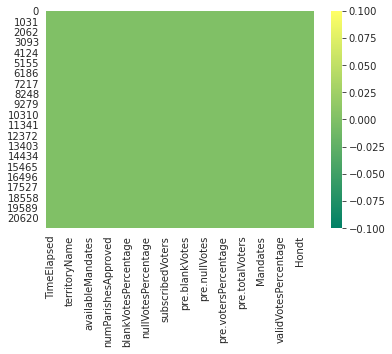

In [ ]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [ ]:
#No Missing Values are present in Dataset thats great.

In [5]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(21643, 28)
['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates']


In [ ]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [ ]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [ ]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

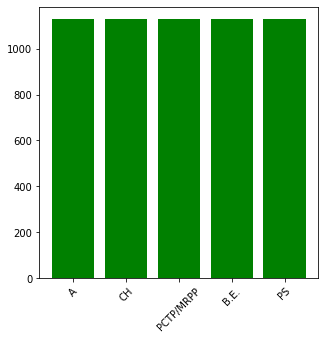

In [7]:
#Univariate Analysis:
#Checking Count of Party:
df['Party'].value_counts()[:5]
plt.figure(figsize=(5,5))
plt.bar(list(df['Party'].value_counts()[:5].keys()),list(df['Party'].value_counts()[:5]),color='green')
plt.xticks(rotation=45)
plt.show()

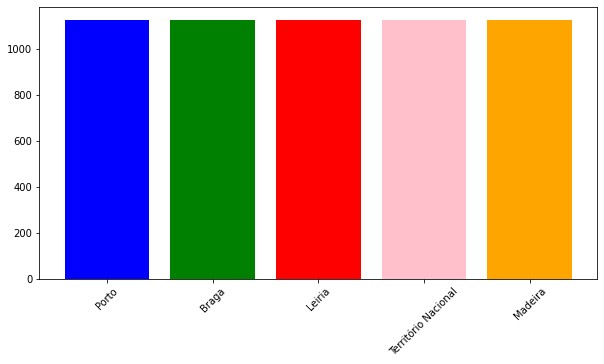

In [42]:
#Univariate Analysis:
#Checking Count of territoryName:
df['territoryName'].value_counts()[:5]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.bar(list(df['territoryName'].value_counts()[:5].keys()),list(df['Party'].value_counts()[:5]),color=["blue","green","red","pink","orange"])
plt.xticks(rotation=45)
plt.show()

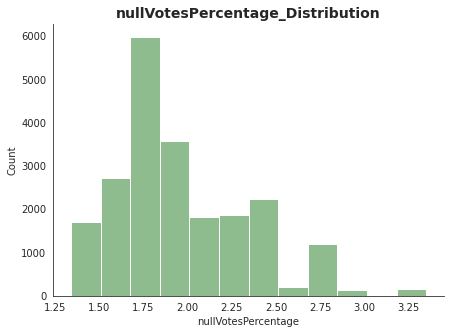

In [ ]:
#Univariate Analysis:
#Checking Distribution of nullVotesPercentage:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["nullVotesPercentage"],bins = 12, color = "darkseagreen")
plt.title("nullVotesPercentage_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("nullVotesPercentage")
plt.ylabel("Count")
sns.despine()
plt.show()

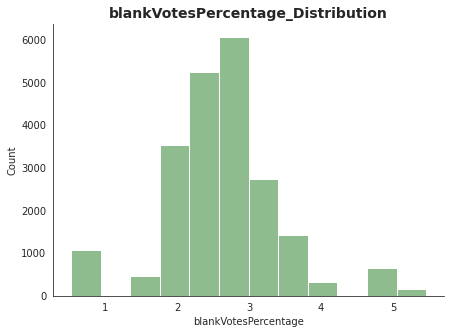

In [ ]:
#Univariate Analysis:
#Checking Distribution of blankVotesPercentage:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["blankVotesPercentage"],bins = 12, color = "darkseagreen")
plt.title("blankVotesPercentage_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("blankVotesPercentage")
plt.ylabel("Count")
sns.despine()
plt.show()

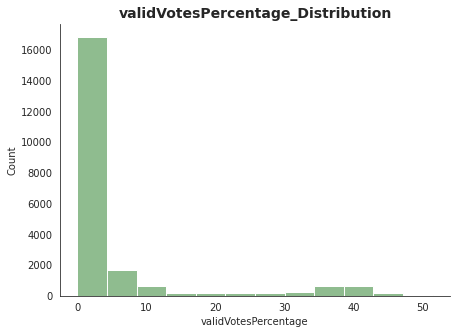

In [ ]:
#Univariate Analysis:
#Checking Distribution of validVotesPercentage:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["validVotesPercentage"],bins = 12, color = "darkseagreen")
plt.title("validVotesPercentage_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("validVotesPercentage")
plt.ylabel("Count")
sns.despine()
plt.show()

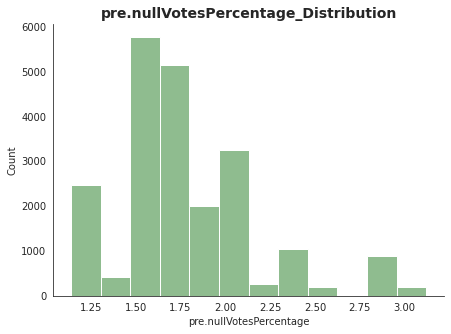

In [ ]:
#Univariate Analysis:
#Checking Distribution of pre.nullVotesPercentage:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["pre.nullVotesPercentage"],bins = 12, color = "darkseagreen")
plt.title("pre.nullVotesPercentage_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("pre.nullVotesPercentage")
plt.ylabel("Count")
sns.despine()
plt.show()

In [ ]:
#We can see the data are somehow Positive Skewed.
#Data are not normally Distributed.

In [ ]:
#We are Going to perform a chi square test to check relationship between two categorigal feature thats is territoryName and Party to check the relationship
#We all know in Hypothesis Testing we take two observations
#H(0) = Null Hypotheisis means theres no difference between sample mean and population mean
#H(a) = theres a significance difference between sample mean and population mean

In [ ]:
import scipy.stats as stats
df_cross = pd.crosstab(df['territoryName'],df['Party'])
print(dataset_table)

Party                 A  B.E.  CDS-PP  CH  IL  ...  PPM  PS  PTP  PURP  R.I.R.
territoryName                                  ...                            
Aveiro               54    54      54  54  54  ...   54  54   54    54      54
Açores               47    47      47  47  47  ...   47  47   47     0       0
Beja                 54    54      54  54  54  ...   54  54   54     0       0
Braga                54    54      54  54  54  ...   54  54   54    54      54
Bragança             54    54      54  54  54  ...   54  54   54    54      54
Castelo Branco       54    54      54  54  54  ...   54  54   54    54      54
Coimbra              54    54      54  54  54  ...   54  54    0    54      54
Faro                 54    54      54  54  54  ...   54  54   54    54      54
Guarda               54    54      54  54  54  ...   54  54   54    54      54
Leiria               54    54      54  54  54  ...   54  54   54    54      54
Lisboa               54    54      54  54  54  ...  

In [ ]:
#Observed Values
Observed_Values = df_cross.values 
print("Observed Values are :",Observed_Values)

Observed Values are : [[54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [47 47 47 47 47  0 47 47 47  0 47 47 47 47 47 47 47 47 47  0  0]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54  0  0]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0  0 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54  0 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54  0 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 5

In [ ]:
value = stats.chi2_contingency(dataset_table)

In [ ]:
Expected_Values=value[3]

In [ ]:
no_of_rows=len(df_cross.iloc[0:2,0])
no_of_columns=len(df_cross.iloc[0,0:2])
degree_of_fredoom = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",degree_of_fredoom)
alpha = 0.05

Degree of Freedom:- 1


In [ ]:
#Lets import Chi square:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 13.878458601485704


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value:If the p-value is larger than the significance level, you fail to reject the null hypothesis because there is not enough evidence to conclude that the variables 
#are associated. Chi-Square Test Chi-Square DF P-Value Pearson 11.788 4 0.019 Likelihood Ratio 11.816 4 0.019.
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.00019502095665746566
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.00019502095665746566


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
#Here Its Saying Reject Null Hypothesis as there a relationship between 2 Categorigal Variables.
#We are relecting Null Hypothesis and considering Alternate Hypothesis.

    territoryName  nullVotesPercentage
0          Guarda             2.714259
1  Castelo Branco             2.500185
2       Vila Real             2.456296
3          Leiria             2.346667
4        Bragança             2.262963
5           Viseu             2.102222
6         Coimbra             2.078704
7           Braga             1.989074
8        Santarém             1.984444
9      Portalegre             1.923333


Text(0.5, 1.0, 'Top 10 territory names with highest null votes percentage')

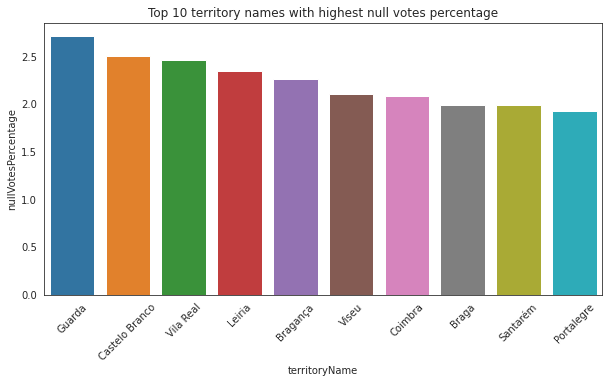

In [ ]:
#Checking null votes percentage:
top_10 = df.groupby(['territoryName'])['nullVotesPercentage'].mean().sort_values(ascending=False).reset_index().head(10)
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['territoryName'],top_10['nullVotesPercentage'])
plt.xlabel('territoryName')
plt.ylabel('nullVotesPercentage')
plt.title('Top 10 territory names with highest null votes percentage')

    Party  pre.blankVotesPercentage
0     MAS                  2.327365
1     JPP                  2.178004
2     MPT                  2.106536
3     PPM                  2.076980
4     PAN                  2.066655
5    B.E.                  2.066655
6  CDS-PP                  2.066655
7      CH                  2.066655
8      IL                  2.066655
9       L                  2.066655


Text(0.5, 1.0, 'Top 10 parties with highest preblankvotepercentage')

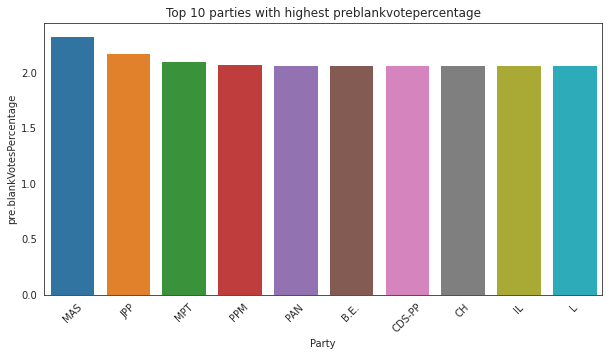

In [ ]:
#Checking Party Wise Blankvote Percentage:
top_10 = df.groupby(['Party'])['pre.blankVotesPercentage'].mean().sort_values(ascending=False).reset_index().head(10)
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Party'],top_10['pre.blankVotesPercentage'])
plt.xlabel('Party')
plt.ylabel('pre.blankVotesPercentage')
plt.title('Top 10 parties with highest preblankvotepercentage')

    Party  votersPercentage
0     JPP         53.575556
1     MAS         53.198447
2    PURP         52.846543
3     MPT         52.509745
4  R.I.R.         52.441160
5      NC         52.224352
6     PTP         52.066035
7    B.E.         51.771127
8  CDS-PP         51.771127
9      CH         51.771127


Text(0.5, 1.0, 'Top 10 parties with highest votes percentage')

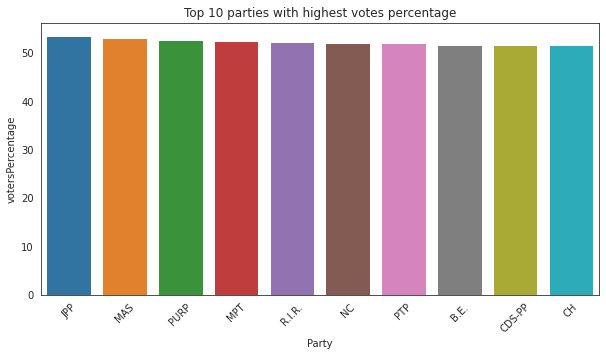

In [ ]:
#Checking Party Wise votersPercentage:
top_10 = df.groupby(['Party'])['votersPercentage'].mean().sort_values(ascending=False).reset_index().head(10)
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Party'],top_10['votersPercentage'])
plt.xlabel('Party')
plt.ylabel('votersPercentage')
plt.title('Top 10 parties with highest votes percentage')

     Party  FinalMandates
0       PS      10.139308
1  PPD/PSD       7.366460
2     B.E.       1.820763
3  PCP-PEV       1.149956
4   CDS-PP       0.479148
5      PAN       0.383319
6       CH       0.095830
7       IL       0.095830
8        L       0.095830
9      MPT       0.000000


Text(0.5, 1.0, 'Top 10 parties with final Mandates')

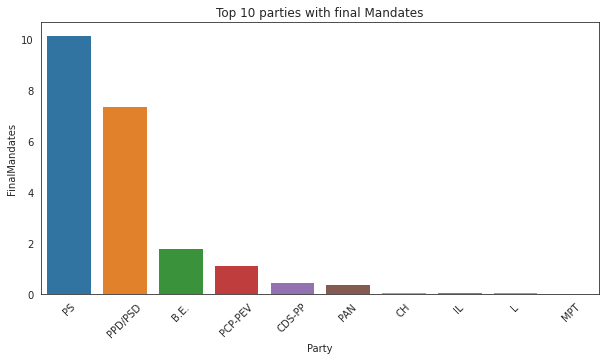

In [ ]:
#Checking Party Wise votersPercentage:
top_10 = df.groupby(['Party'])['FinalMandates'].mean().sort_values(ascending=False).reset_index().head(10)
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Party'],top_10['FinalMandates'])
plt.xlabel('Party')
plt.ylabel('FinalMandates')
plt.title('Top 10 parties with final Mandates')

In [16]:
#converting the Datetime from string Datatype to Datetime:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time

In [17]:
#Lets Drop the Columns thats are not Important:
df.drop(['time','territoryName','Dates'],axis=1,inplace=True)

In [18]:
df.head()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Time
0,0,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,20:10:02
1,0,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,20:10:02
2,0,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,20:10:02
3,0,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,20:10:02
4,0,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,20:10:02


In [19]:
#Doing Mean Encoding in Party column:
party_encoded=pd.Series(df['Party'].value_counts())/len(df['Party'])
x=party_encoded.to_dict()
df['Party_encoded']=df['Party'].map(x)

In [20]:
#Dropping Party column:
df.drop('Party',axis=1,inplace=True)

In [21]:
#Dropping Time column:
df.drop('Time',axis=1,inplace=True)

In [22]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (21643, 26)
After removal of outliers: (17603, 26)


In [23]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('FinalMandates',axis=1)
y = df_final['FinalMandates']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (17603, 25)
shape of y is (17603,)


In [24]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

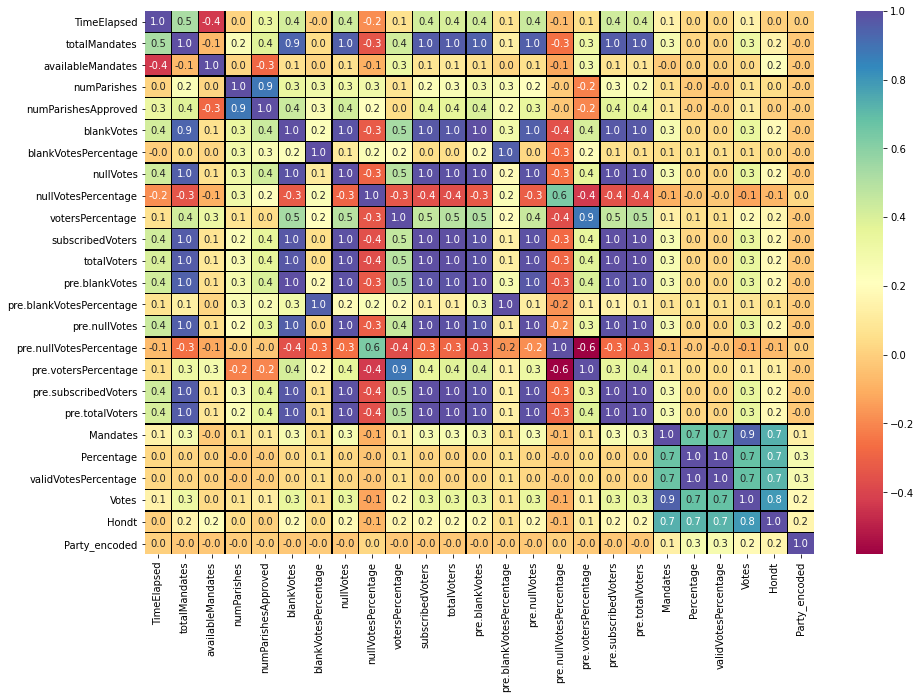

In [26]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [27]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [28]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

13

In [29]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [30]:
X_train_uncorr.shape, X_test_uncorr.shape

((14082, 12), (3521, 12))

In [31]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_uncorr)
X_train_uncorr = scaler.transform(X_train_uncorr)
X_test_uncorr = scaler.transform(X_test_uncorr)

In [32]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [33]:
model = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(X_train_uncorr,y_train)
    print("Score of",m, "is:",m.score(X_train_uncorr,y_train))
    y_predict = m.predict(X_test_uncorr)
    print("Error:")
    print('Mean absolute error:',mean_absolute_error(y_test,y_predict))
    print('Mean squared error:',mean_squared_error(y_test,y_predict))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test,y_predict)))
    print('r2 score is:',r2_score(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.986640291197324
Error:
Mean absolute error: 0.048196102890682595
Mean squared error: 0.039899878742752665
Root mean squared is  0.19974954003139198
r2 score is: 0.9794228748357707
******************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.5237264748601486
Error:
Mean absolute error: 0.4438537854666045
Mean squared error: 0.9032841060125445
Root mean squared is  0.9504125977766417
r2 score is: 0.5341592332118259
******************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is: 0.9866402776627909
Error:
Mean absolute error: 0.0482

In [34]:
#We are getting maximum score in Linear Regression Lets implement it with cross-validation:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_uncorr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.9880115131081654
standard deviation in r2_score for linear Regression: 0.014642185250455766


In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.004992142383792484
MSE: 0.0028414924579507083
RMSE: 0.05330565127592672


In [39]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test_uncorr)

array([ 0.02087947, -0.00442382, -0.00971272, ...,  0.0588163 ,
        1.04075862,  0.02108689])